<a href="https://colab.research.google.com/github/swapnalisingh13/Deep_Learning/blob/main/DL_Lab2_2348565.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_recall_curve, confusion_matrix
from tensorflow.keras.optimizers import SGD as sgd1

In [233]:
from keras.optimizers import SGD

In [234]:
df = pd.read_csv("/content/fraudTest.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [235]:
df.shape

(54449, 23)

In [236]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

dropping missing values

In [237]:
df = df.fillna(0)

In [238]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [239]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [240]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [241]:
df['is_fraud'].unique()

array([0., 1.])

Checking for Unbalanced data

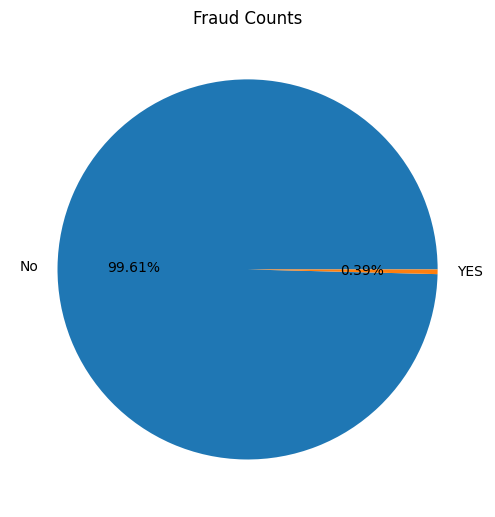

In [242]:
fraud = df["is_fraud"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(fraud, labels=["No", "YES"], autopct="%.2f%%")
plt.title("Fraud Counts")
plt.tight_layout()
plt.show()

In [243]:
No_class = df[df["is_fraud"]==0]
yes_class = df[df["is_fraud"]==1]
#Balancing data
No_class = resample(No_class, replace=False, n_samples=len(yes_class))
down_samples = pd.concat([yes_class, No_class], axis=0)

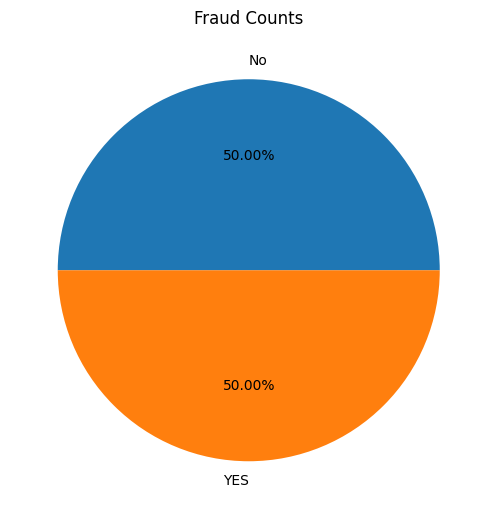

In [244]:
fraud = down_samples["is_fraud"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(fraud, labels=["No", "YES"], autopct="%.2f%%")
plt.title("Fraud Counts")
plt.tight_layout()
plt.show()

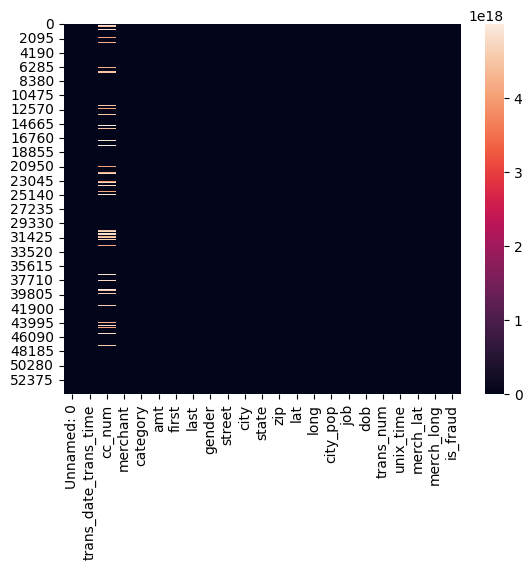

In [245]:
sns.heatmap(df)
plt.show()

Down sampling to make it balance class

In [246]:
X = down_samples.drop(columns=['is_fraud', 'trans_date_trans_time', 'dob', 'trans_num'])
y = down_samples["is_fraud"]

In [247]:
X.shape

(430, 19)

In [248]:
y.shape

(430,)

Scaling

In [249]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Training and testing

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

In [251]:
#with 128 input nodes
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [252]:
#with 64 input nodes
model1 = Sequential()
model1.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(units=32, activation='relu'))
model1.add(Dense(units=1, activation='sigmoid'))

Adam optimizer

In [253]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [254]:
#for 128 input nodes with adam
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 1s 19ms/step - loss: 0.6458 - accuracy: 0.6628 - val_loss: 0.6081 - val_accuracy: 0.7209
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 0.5331 - accuracy: 0.8488 - val_loss: 0.5432 - val_accuracy: 0.7907
Epoch 3/10
11/11 [==============================] - 0s 7ms/step - loss: 0.4539 - accuracy: 0.8605 - val_loss: 0.5074 - val_accuracy: 0.8023
Epoch 4/10
11/11 [==============================] - 0s 6ms/step - loss: 0.3913 - accuracy: 0.8750 - val_loss: 0.4754 - val_accuracy: 0.7791
Epoch 5/10
11/11 [==============================] - 0s 7ms/step - loss: 0.3409 - accuracy: 0.8779 - val_loss: 0.4543 - val_accuracy: 0.8256
Epoch 6/10
11/11 [==============================] - 0s 5ms/step - loss: 0.3024 - accuracy: 0.8983 - val_loss: 0.4409 - val_accuracy: 0.8488
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 0.2696 - accuracy: 0.9070 - val_loss: 0.4348 - val_accuracy: 0.8605
Epoch 8/10
11/11 [=

In [255]:
#for 64 input nodes with adam
model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 1s 19ms/step - loss: 0.6922 - accuracy: 0.5203 - val_loss: 0.6497 - val_accuracy: 0.5930
Epoch 2/10
11/11 [==============================] - 0s 7ms/step - loss: 0.6207 - accuracy: 0.6831 - val_loss: 0.6110 - val_accuracy: 0.6860
Epoch 3/10
11/11 [==============================] - 0s 6ms/step - loss: 0.5648 - accuracy: 0.7471 - val_loss: 0.5742 - val_accuracy: 0.7442
Epoch 4/10
11/11 [==============================] - 0s 7ms/step - loss: 0.5167 - accuracy: 0.8023 - val_loss: 0.5386 - val_accuracy: 0.7907
Epoch 5/10
11/11 [==============================] - 0s 7ms/step - loss: 0.4713 - accuracy: 0.8401 - val_loss: 0.5117 - val_accuracy: 0.7907
Epoch 6/10
11/11 [==============================] - 0s 6ms/step - loss: 0.4304 - accuracy: 0.8576 - val_loss: 0.4904 - val_accuracy: 0.7907
Epoch 7/10
11/11 [==============================] - 0s 5ms/step - loss: 0.3930 - accuracy: 0.8721 - val_loss: 0.4725 - val_accuracy: 0.7791
Epoch 8/10
11/11 [=

In [256]:
loss1, accuracy1 = model.evaluate(X_test, y_test)
loss2, accuracy2 = model1.evaluate(X_test, y_test)
print('Model accuracy(128 nodes): ', accuracy1)
print('Model accuracy(64 nodes): ', accuracy2)

3/3 [==============================] - 0s 5ms/step - loss: 0.4384 - accuracy: 0.8372
Model accuracy(128 nodes):  0.8720930218696594
Model accuracy(64 nodes):  0.8372092843055725


In [257]:
pred1 = model.predict(X_test)
precision1, recall1, thresholds1 = precision_recall_curve(y_test, pred1)
pred2 = model1.predict(X_test)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, pred2)

3/3 [==============================] - 0s 3ms/step


3/3 [==============================] - 0s 4ms/step


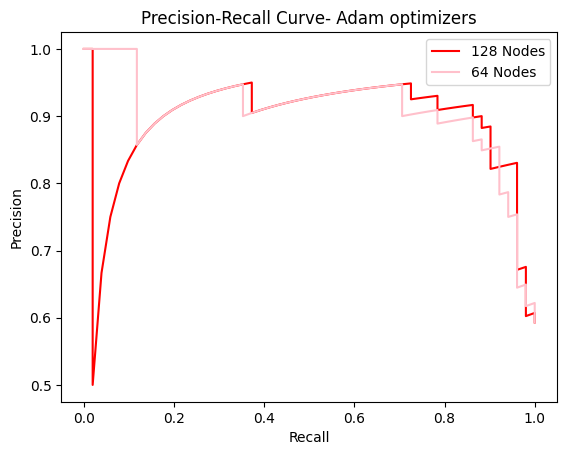

In [258]:
labels = ['64 Nodes', '128 Nodes']
plt.plot(recall1, precision1, color='red', label=labels[1])
plt.plot(recall2, precision2, color='pink', label=labels[0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve- Adam optimizers')
plt.legend()
plt.show()

[[29  6]
 [ 5 46]]


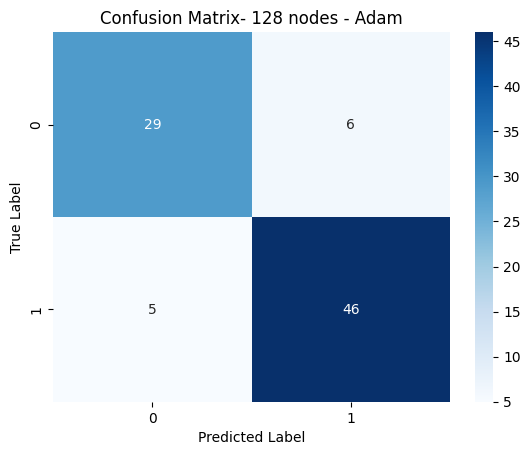

In [271]:
confusion_matrix_result = confusion_matrix(y_test, pred1.round())
print(confusion_matrix_result)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix- 128 nodes - Adam')
plt.show()

[[30  5]
 [ 9 42]]


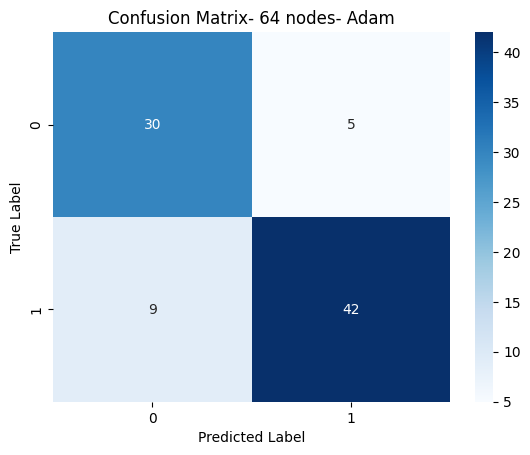

In [272]:
confusion_matrix_result = confusion_matrix(y_test, pred2.round())
print(confusion_matrix_result)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix- 64 nodes- Adam')
plt.show()

SDG optimizer

In [261]:
sgd_optimizer = sgd1(learning_rate=0.01)
#using legacy tensorflow for model and keras for model1
sgd_optimizer1 = SGD(learning_rate=0.01)

In [262]:
#for 128 input nodes with SGD
sgd_optimizer.build(model.trainable_variables)
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [263]:
#for 64 input nodes with SGD
sgd_optimizer1.build(model1.trainable_variables)
model1.compile(optimizer=sgd_optimizer1, loss='binary_crossentropy', metrics=['accuracy'])

In [264]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 1s 20ms/step - loss: 0.1896 - accuracy: 0.9360 - val_loss: 0.4248 - val_accuracy: 0.8721
Epoch 2/10
11/11 [==============================] - 0s 9ms/step - loss: 0.1886 - accuracy: 0.9390 - val_loss: 0.4254 - val_accuracy: 0.8721
Epoch 3/10
11/11 [==============================] - 0s 9ms/step - loss: 0.1873 - accuracy: 0.9390 - val_loss: 0.4261 - val_accuracy: 0.8721
Epoch 4/10
11/11 [==============================] - 0s 10ms/step - loss: 0.1856 - accuracy: 0.9390 - val_loss: 0.4267 - val_accuracy: 0.8721
Epoch 5/10
11/11 [==============================] - 0s 9ms/step - loss: 0.1843 - accuracy: 0.9390 - val_loss: 0.4272 - val_accuracy: 0.8721
Epoch 6/10
11/11 [==============================] - 0s 10ms/step - loss: 0.1831 - accuracy: 0.9390 - val_loss: 0.4276 - val_accuracy: 0.8721
Epoch 7/10
11/11 [==============================] - 0s 10ms/step - loss: 0.1818 - accuracy: 0.9390 - val_loss: 0.4282 - val_accuracy: 0.8721
Epoch 8/10
11/11

In [265]:
model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 1s 29ms/step - loss: 0.2934 - accuracy: 0.8983 - val_loss: 0.4379 - val_accuracy: 0.8372
Epoch 2/10
11/11 [==============================] - 0s 7ms/step - loss: 0.2910 - accuracy: 0.8953 - val_loss: 0.4372 - val_accuracy: 0.8372
Epoch 3/10
11/11 [==============================] - 0s 8ms/step - loss: 0.2887 - accuracy: 0.9012 - val_loss: 0.4369 - val_accuracy: 0.8372
Epoch 4/10
11/11 [==============================] - 0s 6ms/step - loss: 0.2866 - accuracy: 0.8983 - val_loss: 0.4363 - val_accuracy: 0.8488
Epoch 5/10
11/11 [==============================] - 0s 6ms/step - loss: 0.2841 - accuracy: 0.9070 - val_loss: 0.4361 - val_accuracy: 0.8488
Epoch 6/10
11/11 [==============================] - 0s 7ms/step - loss: 0.2818 - accuracy: 0.9041 - val_loss: 0.4355 - val_accuracy: 0.8488
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 0.2797 - accuracy: 0.9041 - val_loss: 0.4350 - val_accuracy: 0.8488
Epoch 8/10
11/11 [=

In [266]:
loss3, accuracy3 = model.evaluate(X_test, y_test)
print('Model accuracy(128 nodes): ', accuracy3)
loss4, accuracy4 = model1.evaluate(X_test, y_test)
print('Model accuracy(64 nodes): ', accuracy4)

3/3 [==============================] - 0s 4ms/step - loss: 0.4299 - accuracy: 0.8721
Model accuracy(128 nodes):  0.8720930218696594
3/3 [==============================] - 0s 4ms/step - loss: 0.4343 - accuracy: 0.8488
Model accuracy(64 nodes):  0.8488371968269348


Seeing both models for 128 and 64 modes we can observe that having multiple input nodes is giving higher accuracy. Also from this we can see that SDG optimizer is sharing the same results as adam optimizers.

Visualization

In [267]:
pred3 = model.predict(X_test)
precision3, recall3, thresholds3 = precision_recall_curve(y_test, pred3)
pred4 = model1.predict(X_test)
precision4, recall4, thresholds4 = precision_recall_curve(y_test, pred4)

3/3 [==============================] - 0s 3ms/step


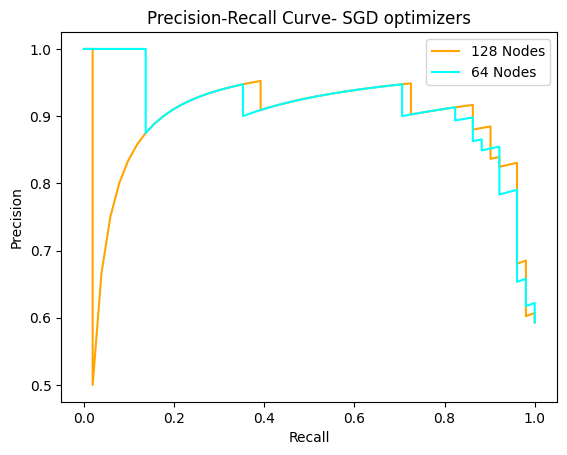

In [268]:
labels = ['64 Nodes', '128 Nodes']
plt.plot(recall3, precision3, color='orange', label=labels[1])
plt.plot(recall4, precision4, color='cyan', label=labels[0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve- SGD optimizers')
plt.legend()
plt.show()

[[29  6]
 [ 5 46]]


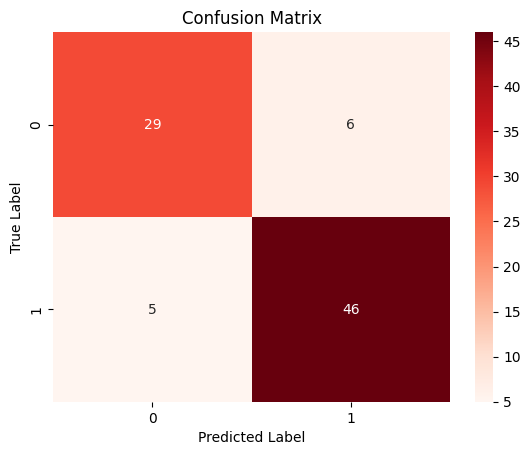

In [273]:
confusion_matrix_result = confusion_matrix(y_test, pred3.round())
print(confusion_matrix_result)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix- 128 nodes- SGD')
plt.show()

[[30  5]
 [ 8 43]]


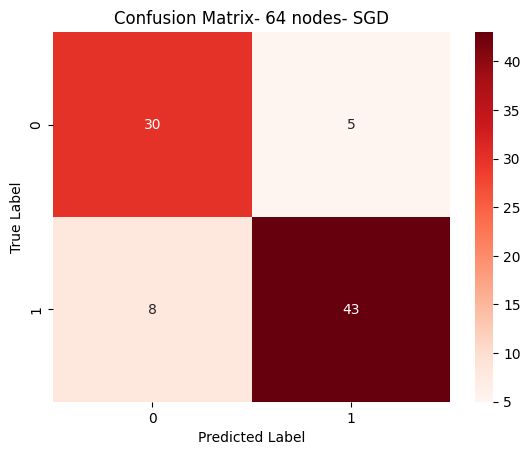

In [275]:
confusion_matrix_result = confusion_matrix(y_test, pred4.round())
print(confusion_matrix_result)
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix- 64 nodes- SGD')
plt.show()